## Enunciado

> Considere la información del proyecto cuya información aparece en la tabla adjunta:
> 1. Calcule los tres diagramas de Gantt correspondientes al análisis de valor ganado.
> 2. Calcule EV, PV, AC, CPI y SPI para el punto de control actual.
> 3. Calcule utilizando el método de MonteCarlo la duración media y la desviación típica del resto de proyecto que falta por completar. Suponga para ello que la duración aleatoria de las actividades ya empezadas es proporcional a su duración planificada original.


In [1]:
# Alargamos el ancho de las celdas al 100%
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

import pandas as pd
import numpy as np

datos_enunciado = pd.DataFrame([
#  actividad, precedentes, duracion, desviación, coste_planificado, coste_real, duracion_real, realizado 
     ('A',      '---    ',       2,          0.5,         60,              80,          2,           100,   ),
     ('B',      '---    ',       2,          0.2,         60,              60,          3,           100,   ),  
     ('C',      '---    ',       3,          0.6,         60,              80,          4,           100,   ),
     ('D',      'A      ',       4,          0.1,         40,              60,          5,           100,   ),
     ('E',      'A      ',       1,          0.3,         30,              36,          3,           100,   ), 
     ('F',      'E, B   ',       2,          0.7,         12,              12,          3,           100,   ),
     ('G',      'E, B   ',       1,          0.2,         39,              54,          3,           100,   ),
     ('H',      'G, C   ',       4,          0.3,         36,              72,          2,            50,   ),
     ('I',      'D, F   ',       1,          0.7,         90,              90,          2,            60,   ),
     ('J',      'D, F, H',       2,          0.3,         50,               0,          0,             0,   ),
     ('K',      'D, F, H',       2,          0.9,         40,               0,          0,             0,   ),
     ('L',      'I, J   ',       2,          0.3,         30,               0,          0,             0,   ),
     ('M',      'K      ',       2,          0.6,         30,               0,          0,             0,   ),
] ,columns=['actividad', 'precedentes', 'duracion', 'desviacion', 
            'coste_planificado', 'coste_real', 'duracion_real', 'realizado']).set_index('actividad')
datos_enunciado

,precedentes,duracion,desviacion,coste_planificado,coste_real,duracion_real,realizado
actividad,,,,,,,
A,---,2,0.5,60,80,2,100
B,---,2,0.2,60,60,3,100
C,---,3,0.6,60,80,4,100
D,A,4,0.1,40,60,5,100
E,A,1,0.3,30,36,3,100
F,"E, B",2,0.7,12,12,3,100
G,"E, B",1,0.2,39,54,3,100
H,"G, C",4,0.3,36,72,2,50
I,"D, F",1,0.7,90,90,2,60


In [2]:
numero_de_muestras = 10

nombres_de_actividades = datos_enunciado.index
np.random.seed(2019)
duraciones_montecarlo = pd.DataFrame([np.random.normal(size = numero_de_muestras,
                                                       loc  = datos_enunciado.duracion[task],
                                                       scale= datos_enunciado.desviacion[task])
                                      for task in nombres_de_actividades],
                                     index=nombres_de_actividades).T.round(1)

In [3]:
duraciones_montecarlo

actividad,A,B,C,D,E,F,G,H,I,J,K,L,M
0,1.9,1.7,2.4,3.9,0.8,2.8,1.3,4.5,1.4,1.8,2.1,1.8,2.6
1,2.4,1.9,3.0,4.0,0.7,1.6,0.6,4.2,2.0,1.8,2.3,1.7,2.0
2,2.7,2.0,1.1,4.1,0.5,1.3,1.0,3.8,0.8,2.1,1.8,2.0,2.8
3,2.7,1.9,3.6,4.0,0.6,1.4,1.1,3.7,0.9,1.9,2.3,2.3,2.6
4,1.8,2.0,3.5,3.9,1.1,2.2,0.7,3.5,1.2,1.9,2.1,1.7,2.8
5,2.3,2.0,3.3,3.9,0.9,2.2,0.9,3.5,0.6,1.8,1.5,2.1,0.7
6,2.3,2.5,3.2,3.9,1.4,3.1,0.9,4.1,1.8,1.9,2.1,1.6,2.2
7,2.1,2.1,3.3,4.1,0.8,1.7,0.9,4.0,0.5,1.4,3.5,2.8,1.4
8,1.9,2.2,2.7,4.1,1.6,1.2,1.0,3.2,0.3,2.1,2.3,1.9,1.7
9,2.5,1.9,2.5,4.0,0.9,1.5,0.7,3.9,1.3,1.6,2.1,1.9,2.0


### Apartado 1

>1. Calcule los tres diagramas de Gantt correspondientes al análisis de valor ganado.

En pmule (project management at ULE) está el código que utilizamos para calcular los valores del PERT.

In [4]:
from pmule import calcula_encadenamientos, GrafoProyecto, ValorGanado

In [5]:
calcula_encadenamientos(datos_enunciado.precedentes)

actividad,A,B,C,D,E,F,G,H,I,J,K,L,M
actividad,,,,,,,,,,,,,
A,,,,,,,,,,,,,
B,,,,,,,,,,,,,
C,,,,,,,,,,,,,
D,True,,,,,,,,,,,,
E,True,,,,,,,,,,,,
F,,True,,,True,,,,,,,,
G,,True,,,True,,,,,,,,
H,,,True,,,,True,,,,,,
I,,,,True,,True,,,,,,,


La clase PertGraph permite visualizar el grafo PERT, el diagrama de Gantt así como realizar el cálculo de tiempos tempranos, tardíos y de las holguras totales.

In [6]:
aristas = pd.DataFrame([
# actividad, nodo_inicial, nodo_final
  (  'A',           1,  2       ),
  (  'B',           1,  3       ),
  (  'C',           1,  4       ),
  (  'D',           2,  5       ),
  (  'E',           2,  3       ),
  (  'F',           3,  5       ),
  (  'G',           3,  4       ),
  (  'H',           4,  6       ),
  (  'I',           5,  7       ),
  (  'J',           6,  7       ),
  (  'K',           6,  8       ),
  (  'L',           7,  9       ),
  (  'M',           8,  9       ),
  ( 'f1',           5,  6       ),   
] ,columns=['actividad', 'nodo_inicial', 'nodo_final']).set_index('actividad')
datos_proyecto = pd.concat([datos_enunciado, aristas], axis=1, sort=False).set_index(aristas.index).fillna(0)
datos_proyecto

,precedentes,duracion,desviacion,coste_planificado,coste_real,duracion_real,realizado,nodo_inicial,nodo_final
actividad,,,,,,,,,
A,---,2.0,0.5,60.0,80.0,2.0,100.0,1,2
B,---,2.0,0.2,60.0,60.0,3.0,100.0,1,3
C,---,3.0,0.6,60.0,80.0,4.0,100.0,1,4
D,A,4.0,0.1,40.0,60.0,5.0,100.0,2,5
E,A,1.0,0.3,30.0,36.0,3.0,100.0,2,3
F,"E, B",2.0,0.7,12.0,12.0,3.0,100.0,3,5
G,"E, B",1.0,0.2,39.0,54.0,3.0,100.0,3,4
H,"G, C",4.0,0.3,36.0,72.0,2.0,50.0,4,6
I,"D, F",1.0,0.7,90.0,90.0,2.0,60.0,5,7


In [7]:
proyecto = GrafoProyecto(datos_proyecto)

#### Gantt Valor Planificado

In [8]:
vg = ValorGanado(proyecto)

In [9]:
gantts = vg.calcula_gantts(duraciones_planificadas   = datos_proyecto['duracion'],
                           duraciones_reales         = datos_proyecto['duracion_real'],
                           costes_planificados       = datos_proyecto['coste_planificado'],
                           costes_reales             = datos_proyecto['coste_real'],
                           porcentaje_de_completacion= datos_proyecto['realizado'])

In [10]:
gantts['Gantt_PV']

,1,2,3,4,5,6,7,8,9,10,11,12,Total
A,30,30,,,,,,,,,,,60
B,30,30,,,,,,,,,,,60
C,20,20,20,,,,,,,,,,60
D,,,10,10,10,10,,,,,,,40
E,,,30,,,,,,,,,,30
F,,,,6,6,,,,,,,,12
G,,,,39,,,,,,,,,39
H,,,,,9,9,9,9,,,,,36
I,,,,,,,90,,,,,,90
J,,,,,,,,,25,25,,,50


#### Gantt Valor Ganado

In [11]:
gantts['Gantt_EV']

,1,2,3,4,5,6,7,8,9,10,Total
A,30,30,,,,,,,,,60
B,20,20,20,,,,,,,,60
C,15,15,15,15,,,,,,,60
D,,,8,8,8,8,8,,,,40
E,,,10,10,10,,,,,,30
F,,,,,,4,4,4,,,12
G,,,,,,13,13,13,,,39
H,,,,,,,,,9,9,18
I,,,,,,,,,27,27,54
Total,65,65,53,33,18,25,25,17,36,36,373


#### Gantt Coste Real

In [12]:
gantts['Gantt_AC']

,1,2,3,4,5,6,7,8,9,10,Total
A,40,40,,,,,,,,,80
B,20,20,20,,,,,,,,60
C,20,20,20,20,,,,,,,80
D,,,12,12,12,12,12,,,,60
E,,,12,12,12,,,,,,36
F,,,,,,4,4,4,,,12
G,,,,,,18,18,18,,,54
H,,,,,,,,,36,36,72
I,,,,,,,,,45,45,90
Total,80,80,64,44,24,34,34,22,81,81,544


### Apartado 2
> 2. Calcule EV, PV, AC, CPI y SPI para el punto de control actual sin ayudarse de los gráficos de Gantt.


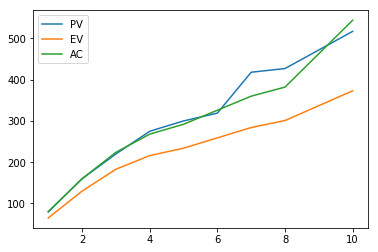

In [13]:
acumulados = gantts['acumulados']
acumulados.plot();

In [14]:
acumulados.tail(1)

,PV,EV,AC
10,517,373,544


In [15]:
EV = acumulados.tail(1)['EV']
EV

10    373
Name: EV, dtype: object

In [16]:
AC = acumulados.tail(1)['AC']
AC

10    544
Name: AC, dtype: object

In [17]:
PV = acumulados.tail(1)['PV']
PV

10    517
Name: PV, dtype: object

In [18]:
CPI = EV/AC
CPI

10    0.685662
dtype: object

In [19]:
SPI=EV/PV
SPI

10    0.72147
dtype: object

### Apartado 3

> 3. Calcule utilizando el método de MonteCarlo la duración media y la desviación típica del resto de proyecto que falta por completar. Suponga para ello que la duración aleatoria de las actividades ya empezadas se calcula de manera proporcional a su duración aleatoria planificada original.


#### Fragmento de proyecto por realizar

In [20]:
datos_proyecto_restante = datos_proyecto.query('realizado != 100').drop(['f1']).copy().reindex(['nodo_inicial', 'nodo_final',
                                                                                                'duracion', 'duracion_real',
                                                                                                'realizado'], axis=1)
datos_proyecto_restante

,nodo_inicial,nodo_final,duracion,duracion_real,realizado
actividad,,,,,
H,4,6,4.0,2.0,50.0
I,5,7,1.0,2.0,60.0
J,6,7,2.0,0.0,0.0
K,6,8,2.0,0.0,0.0
L,7,9,2.0,0.0,0.0
M,8,9,2.0,0.0,0.0


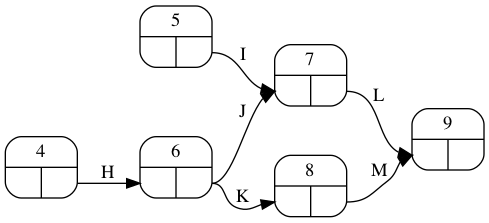

In [21]:
proyecto = GrafoProyecto(datos_proyecto_restante)
proyecto.pert(duraciones=False)

#### Cálculo de las duraciones del resto del proyecto

In [22]:
restantes = datos_proyecto_restante.query('realizado != 100')
duraciones_montecarlo = duraciones_montecarlo.reindex(restantes.index, axis=1)
duraciones_montecarlo = duraciones_montecarlo.eval('Hrestante = H * 0.5')
duraciones_montecarlo = duraciones_montecarlo.eval('Irestante = I * 0.4')
duraciones_montecarlo

actividad,H,I,J,K,L,M,Hrestante,Irestante
0,4.5,1.4,1.8,2.1,1.8,2.6,2.25,0.56
1,4.2,2.0,1.8,2.3,1.7,2.0,2.10,0.80
2,3.8,0.8,2.1,1.8,2.0,2.8,1.90,0.32
3,3.7,0.9,1.9,2.3,2.3,2.6,1.85,0.36
4,3.5,1.2,1.9,2.1,1.7,2.8,1.75,0.48
5,3.5,0.6,1.8,1.5,2.1,0.7,1.75,0.24
6,4.1,1.8,1.9,2.1,1.6,2.2,2.05,0.72
7,4.0,0.5,1.4,3.5,2.8,1.4,2.00,0.20
8,3.2,0.3,2.1,2.3,1.9,1.7,1.60,0.12
9,3.9,1.3,1.6,2.1,1.9,2.0,1.95,0.52


#### Cálculo de los tiempos tempranos

In [23]:
t_early = pd.DataFrame()
t_early['nodo_4'] = np.zeros(numero_de_muestras)
t_early['nodo_5'] = np.zeros(numero_de_muestras)
t_early['nodo_6'] = t_early['nodo_4'] + duraciones_montecarlo['Hrestante'] 
t_early['nodo_7'] = pd.DataFrame( { 'input_I': t_early['nodo_5'] + duraciones_montecarlo['Irestante'] ,
                                    'input_J': t_early['nodo_6'] + duraciones_montecarlo['J']
                                  }).max(axis=1)
t_early['nodo_8'] = t_early['nodo_6'] + duraciones_montecarlo['K'] 
t_early['nodo_9'] = pd.DataFrame( { 'input_L': t_early['nodo_7'] + duraciones_montecarlo['L'] ,
                                    'input_M': t_early['nodo_8'] + duraciones_montecarlo['M']
                                  }).max(axis=1)
t_early

,nodo_4,nodo_5,nodo_6,nodo_7,nodo_8,nodo_9
0,0.0,0.0,2.25,4.05,4.35,6.95
1,0.0,0.0,2.10,3.90,4.40,6.40
2,0.0,0.0,1.90,4.00,3.70,6.50
3,0.0,0.0,1.85,3.75,4.15,6.75
4,0.0,0.0,1.75,3.65,3.85,6.65
5,0.0,0.0,1.75,3.55,3.25,5.65
6,0.0,0.0,2.05,3.95,4.15,6.35
7,0.0,0.0,2.00,3.40,5.50,6.90
8,0.0,0.0,1.60,3.70,3.90,5.60
9,0.0,0.0,1.95,3.55,4.05,6.05


In [24]:
t_early['nodo_9'].mean()

6.380000000000001

In [25]:
t_early['nodo_9'].std()

0.4796989796852929

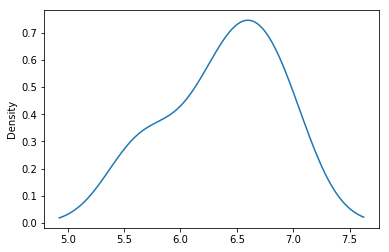

In [26]:
t_early['nodo_9'].plot(kind='density');